## Analiza - Red Wine Quality Dataset
- Analiza wstępna
- Budowanie modelu
- Optymalizacja

##### Import bibliotek

In [299]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import ConvergenceWarning
import plotly.express as px
from sklearn.calibration import LabelEncoder
import warnings

##### Załadowanie danych, wyświetlenie informacji o zbiorze danych

In [300]:

try:
    data = pd.read_csv('winequality-red.csv', encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv('winequality-red.csv', encoding='latin1')

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Nazwy cech i ich typy, wraz z ilością wierszy oraz kolumn

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Opis statysyczny danych

In [302]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

#### Opis poszczególnych kolumn
- fixed acidity - Zawartość stałych kwasów w winie, takich jak kwas winowy, który wpływa na smak.
- volatile acidity - Zawartość lotnych kwasów, które mogą wpływać na zapach wina.
- citric acid - Zawartość kwasu cytrynowego, który może dodać świeżości w winie.
- residual sugar - Zawartość resztkowego cukru, który nie został przekształcony w alkohol podczas fermentacji.
- chlorides - Zawartość soli, która może wpływać na smak wina.
- free sulfur dioxide - Wolny dwutlenek siarki, który działa jako środek konserwujący.
- total sulfur dioxide - Całkowity dwutlenek siarki, który obejmuje zarówno wolny, jak i związany dwutlenek siarki.
- density - Gęstość wina, która może wskazywać na jego zawartość cukru i alkoholu.
- pH - Skala kwasowości, która wpływa na stabilność i smak wina.
- sulphates - Zawartość siarczanów, które mogą wpływać na smak i trwałość wina.
- alcohol - Zawartość alkoholu w winie, która wpływa na jego moc i smak.
- quality - Ocena jakości wina, wyrażona jako liczba całkowita od 0 do 10.

In [303]:
for column in data.columns:
    print(f"Opis kolumny '{column}':")
    print(data[column].describe())
    print()

Opis kolumny 'fixed acidity':
count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

Opis kolumny 'volatile acidity':
count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

Opis kolumny 'citric acid':
count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

Opis kolumny 'residual sugar':
count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Opis kolumny 'chlorides':
count    1599.000000
mean     

Sprawdzanie ilości braków danych, 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

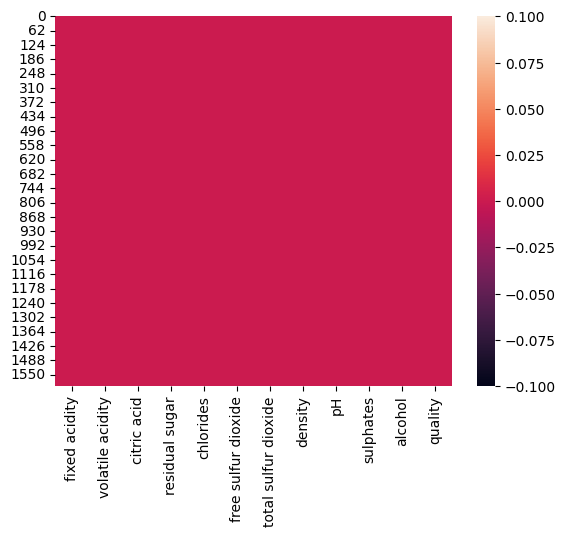

In [304]:
sns.heatmap(data.isnull())
data.isnull().sum()

Sprawdzanie duplikatów

In [305]:
data.duplicated().sum()

240

Usunięcie duplikatów

In [306]:
data.drop_duplicates(inplace = True)
data.describe(include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Usunięcie wartości odstających - metoda IQR

In [307]:
# Usuwanie wartości odstających metodą IQR
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.85, numeric_only=True)
IQR = Q3 - Q1

print("Data set size before removing outliers " + str(data.shape[0]))
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Data set size after removing outliers " + str(data.shape[0]))

Data set size before removing outliers 1359
Data set size after removing outliers 1169


Wizualizacja

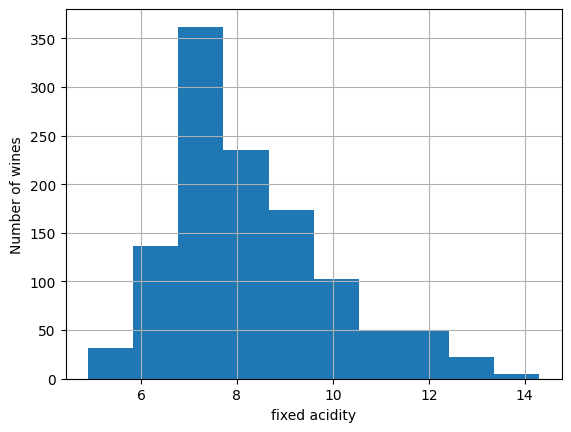

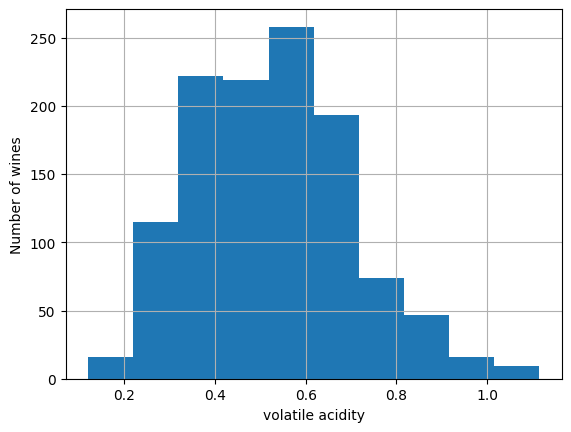

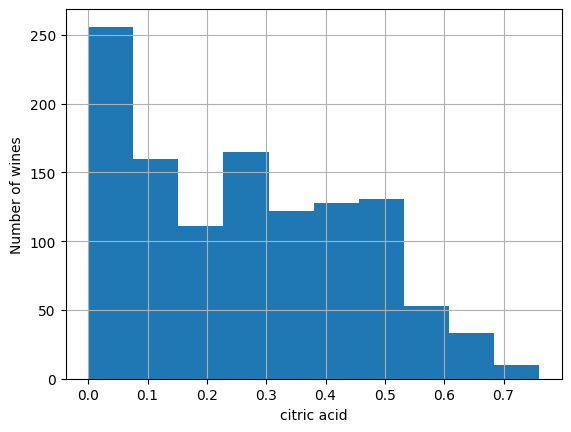

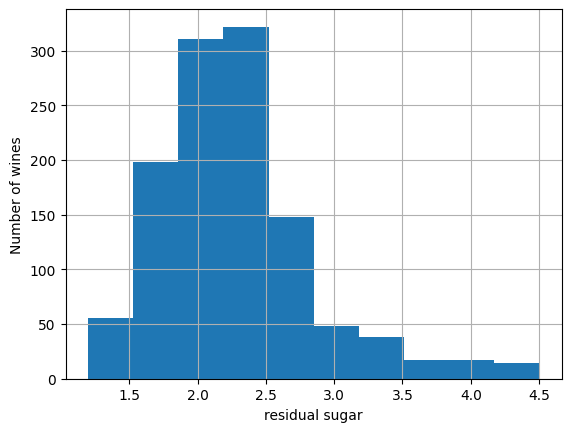

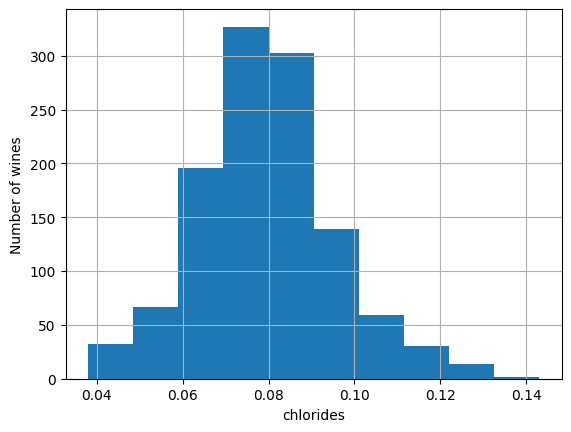

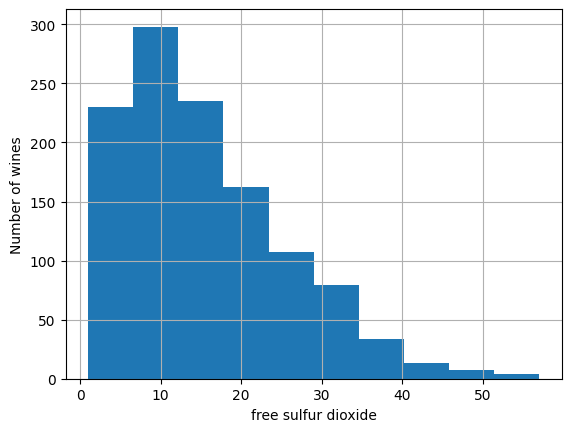

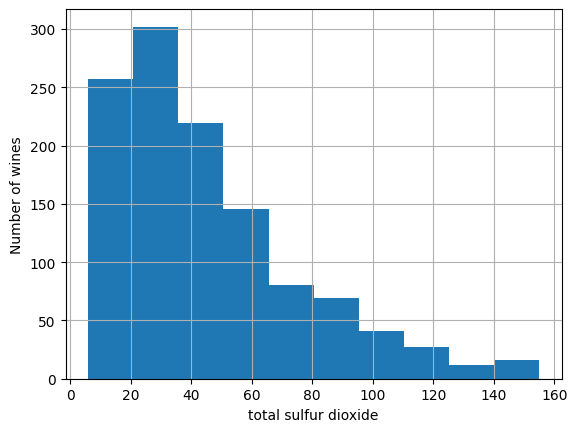

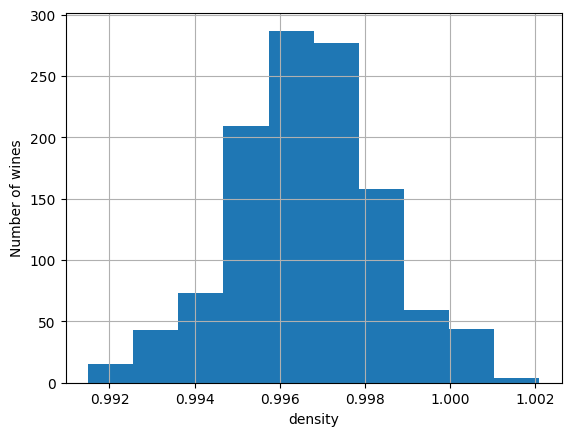

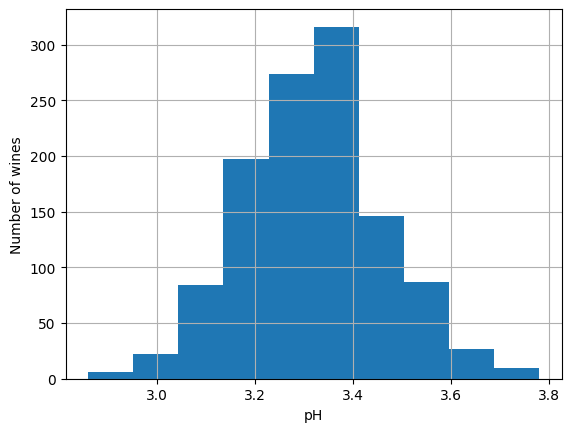

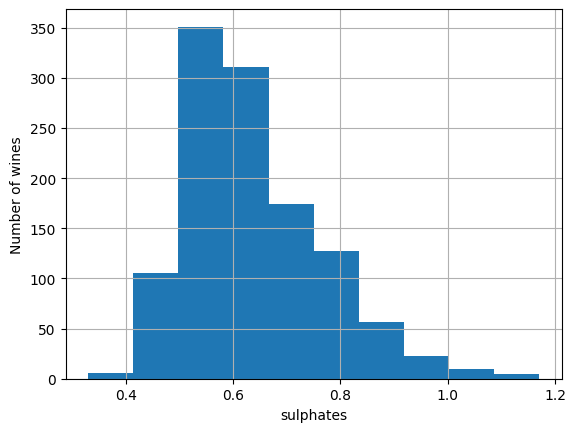

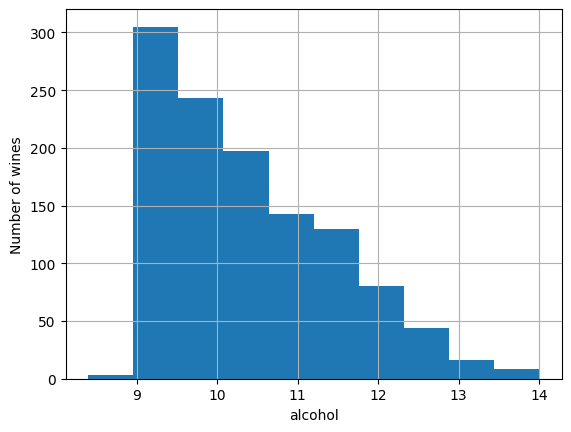

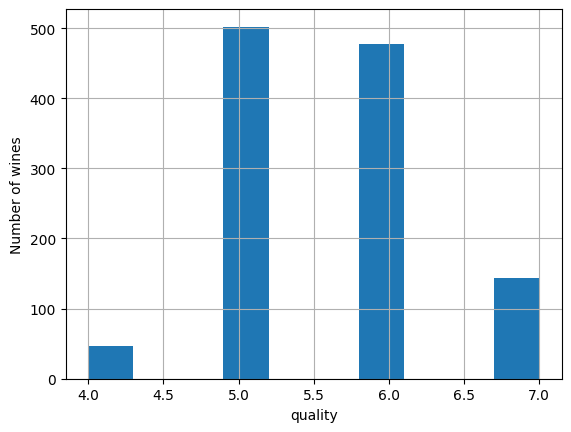

In [308]:
for column in data:
  data[column].hist()
  plt.xlabel(column)
  plt.ylabel("Number of wines")
  plt.show()

In [ ]:
sns.pairplot(data)

Tworzenie nowych cech
- Density-to-Alcohol Ratio - Gęstość wina jest powiązana z zawartością alkoholu i cukru. Wprowadzenie wskaźnika gęstości do alkoholu może pomóc w identyfikacji wina o specyficznych właściwościach, które mogą wpływać na jego jakość.

- Sulfur Dioxide Ratio - Dwutlenek siarki jest stosowany jako środek konserwujący w winie. Wprowadzenie wskaźnika dwutlenku siarki do alkoholu może pomóc w identyfikacji wina o specyficznych właściwościach, które mogą wpływać na jego jakość.

- Total Acidity -  Suma kwasów (stałych i lotnych) może być istotnym wskaźnikiem smaku wina. Wina z odpowiednią równowagą kwasów mogą być lepiej oceniane.

In [309]:
data.loc[:, 'density_to_alcohol_ratio'] = data['density'] / data['alcohol']
data.loc[:, 'total_acidity'] = data['fixed acidity'] + data['volatile acidity']
data.loc[:, 'sulfur_dioxide_ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']

data.head()

C:\Users\Mikolaj\AppData\Local\Temp\ipykernel_4444\2922485261.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mikolaj\AppData\Local\Temp\ipykernel_4444\2922485261.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mikolaj\AppData\Local\Temp\ipykernel_4444\2922485261.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,density_to_alcohol_ratio,total_acidity,sulfur_dioxide_ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.106149,8.10,0.323529
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.101714,8.68,0.373134
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.101735,8.56,0.277778
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.101837,11.48,0.283333
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0.106149,8.06,0.325000


Usuwanie nieużywanych cech

In [310]:
print("Liczba unikalnych wartości dla każdej cechy:")
print(data.nunique())

Liczba unikalnych wartości dla każdej cechy:
fixed acidity                88
volatile acidity            133
citric acid                  76
residual sugar               47
chlorides                    92
free sulfur dioxide          52
total sulfur dioxide        135
density                     395
pH                           80
sulphates                    76
alcohol                      59
quality                       4
density_to_alcohol_ratio    999
total_acidity               717
sulfur_dioxide_ratio        532
dtype: int64


Wizualizacje

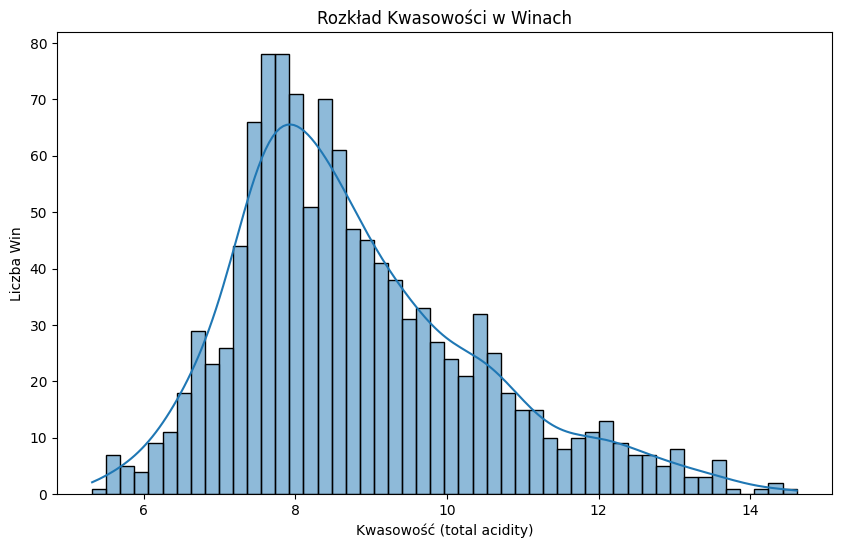

In [311]:
fig = px.bar(
    x=data.quality.value_counts().index,
    y=data.quality.value_counts().values,
    labels={"x": "Jakość Wina", "y": "Liczba Win"},
    title="Liczba win o różnych poziomach jakości",
    color=data.quality.value_counts().index,
    color_continuous_scale="Blues"
)
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)
fig.show()

# Zawartość alkoholu a jakość
fig = px.scatter(
    data,
    y="alcohol",
    x="quality",
    title="Zawartość alkoholu a jakość",
    color="quality",
    color_continuous_scale="Blues"
)
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    title_x=0.5
)
fig.show()

# Rozkład kwasowości w winach
plt.figure(figsize=(10, 6))
sns.histplot(data['total_acidity'], bins=50, kde=True)
plt.title('Rozkład Kwasowości w Winach')
plt.xlabel('Kwasowość (total acidity)')
plt.ylabel('Liczba Win')
plt.show()


In [312]:
low_unique_threshold = 50
low_unique_features = [col for col in data.columns if data[col].nunique() <= low_unique_threshold]
print(f"Niski różnorodne cechy: {low_unique_features}")
data = data.drop(columns=['residual sugar']) # Quality usuwam w kolejnej części

Niski różnorodne cechy: ['residual sugar', 'quality']


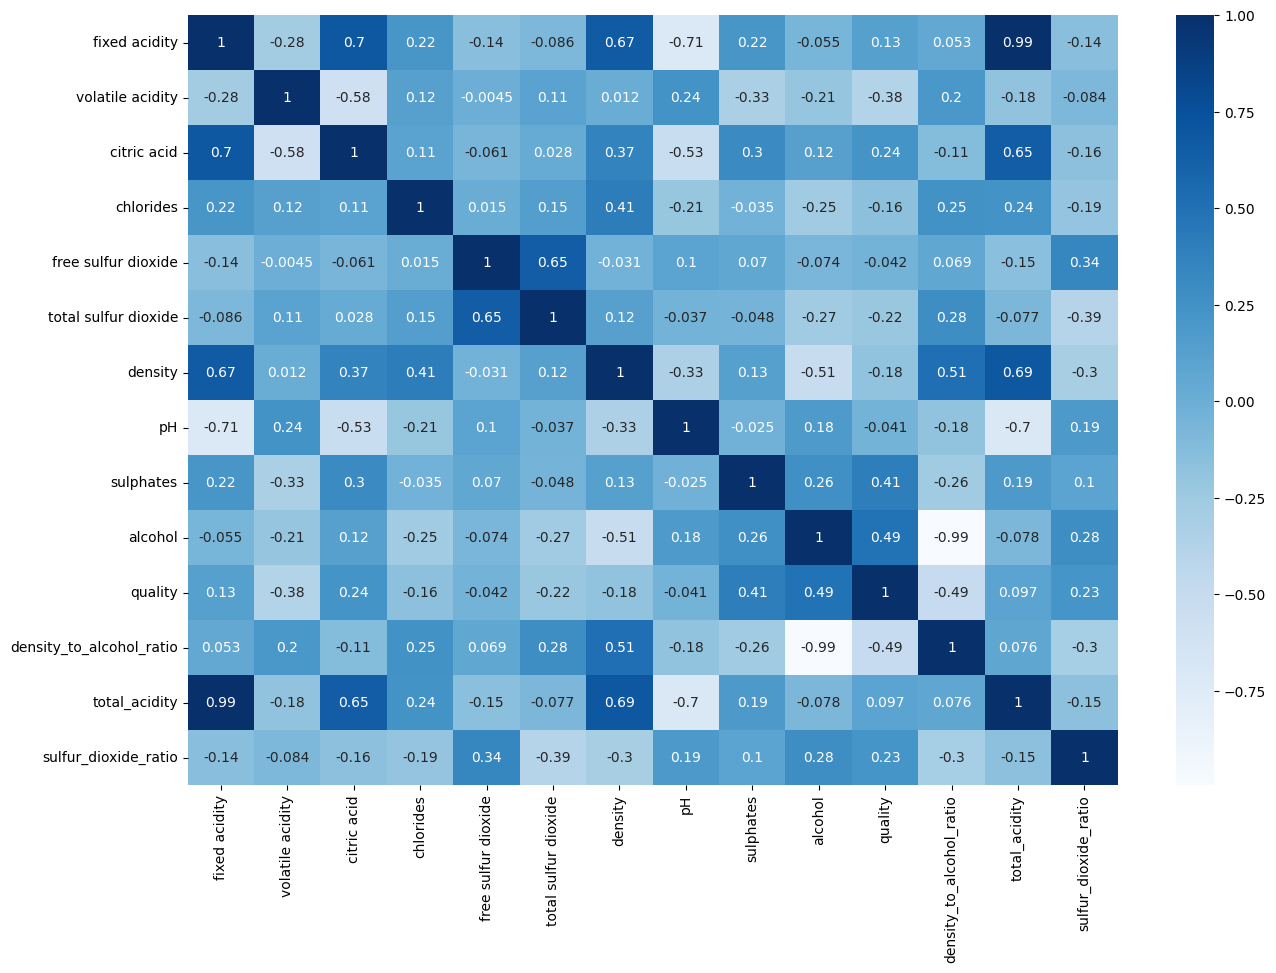

In [313]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True, cmap='Blues')

plt.show()

Podział danych na zbiór treningowy i testowy, standaryzacja danych

In [314]:

data = data.reset_index(drop=True)

# Convert labels to discrete classes
le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

# Ensure 'quality' is treated as categorical
data['quality'] = data['quality'].astype('category')

# Split data into training and testing sets
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

Metoda do rysowania krzywej ROC

In [315]:
def plot_roc_curve(y_test, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (area = {roc_auc:.2f})')

Metoda pomocnicza

In [316]:

warnings.filterwarnings('ignore', category=ConvergenceWarning)

def train_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print(f"Najlepsze hiperparametry: {best_params}")

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    class_report = classification_report(y_test, y_pred, zero_division=0)
    print("Classification Report:")
    print(class_report)

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(X_test)[:, 1]
    else:
        y_prob = best_model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

    return {
        'Model': type(model).__name__,
        'Best Params': best_params,
        'Classification Report': class_report,
        'Confusion Matrix': cm.tolist(),  # convert to list for proper dataframe handling
        'ROC AUC': roc_auc
    }

Model KNN

Najlepsze hiperparametry: {'n_neighbors': 5}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.66      0.57        97
           2       0.48      0.43      0.46       104
           3       0.56      0.19      0.29        26

    accuracy                           0.49       234
   macro avg       0.38      0.32      0.33       234
weighted avg       0.48      0.49      0.47       234

Confusion Matrix:
[[ 0  2  5  0]
 [ 1 64 30  2]
 [ 2 55 45  2]
 [ 1  7 13  5]]


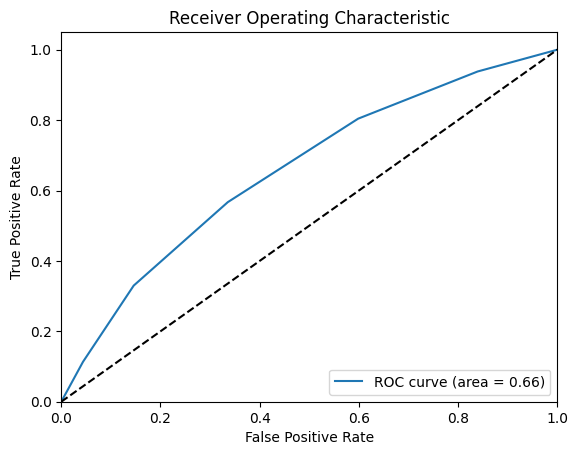

In [317]:
param_grid_knn = {'n_neighbors': [3, 5, 7]}
results_knn = train_and_evaluate_model(KNeighborsClassifier(), param_grid_knn, X_train, y_train, X_test, y_test)

Model Logistic Regression

Najlepsze hiperparametry: {'C': 10, 'penalty': 'l2'}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.63      0.78      0.70        97
           2       0.60      0.53      0.56       104
           3       0.43      0.35      0.38        26

    accuracy                           0.60       234
   macro avg       0.41      0.41      0.41       234
weighted avg       0.57      0.60      0.58       234

Confusion Matrix:
[[ 0  5  2  0]
 [ 0 76 20  1]
 [ 0 38 55 11]
 [ 0  2 15  9]]


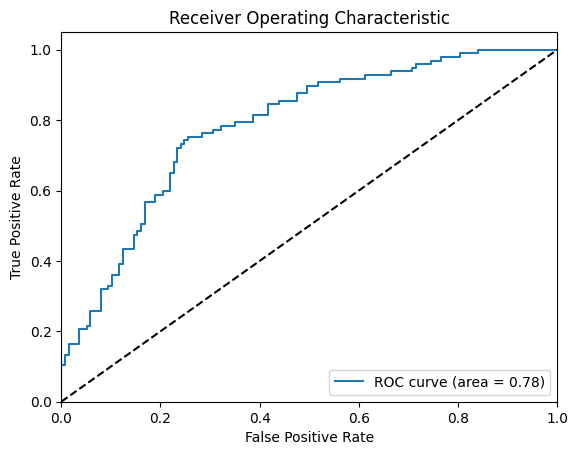

In [318]:
param_grid_log_reg = {'C': [0.1, 1, 10], 'penalty': ['l2']}
results_log_reg = train_and_evaluate_model(LogisticRegression(max_iter=1000), param_grid_log_reg, X_train, y_train, X_test, y_test)

Model Decision Tree

Najlepsze hiperparametry: {'max_depth': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.14      0.13         7
           1       0.60      0.71      0.65        97
           2       0.57      0.50      0.53       104
           3       0.45      0.35      0.39        26

    accuracy                           0.56       234
   macro avg       0.44      0.43      0.43       234
weighted avg       0.56      0.56      0.55       234

Confusion Matrix:
[[ 1  4  2  0]
 [ 2 69 25  1]
 [ 5 37 52 10]
 [ 0  5 12  9]]


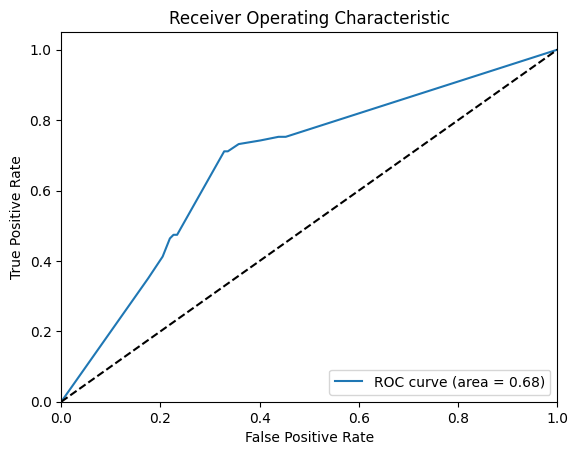

In [319]:
param_grid_decision_tree = {'max_depth': [None, 10, 20, 30]}
results_decision_tree = train_and_evaluate_model(DecisionTreeClassifier(), param_grid_decision_tree, X_train, y_train, X_test, y_test)

Model Random Forest

Najlepsze hiperparametry: {'n_estimators': 50}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.62      0.77      0.69        97
           2       0.62      0.56      0.59       104
           3       0.47      0.35      0.40        26

    accuracy                           0.61       234
   macro avg       0.43      0.42      0.42       234
weighted avg       0.58      0.61      0.59       234

Confusion Matrix:
[[ 0  6  1  0]
 [ 0 75 22  0]
 [ 0 36 58 10]
 [ 0  4 13  9]]


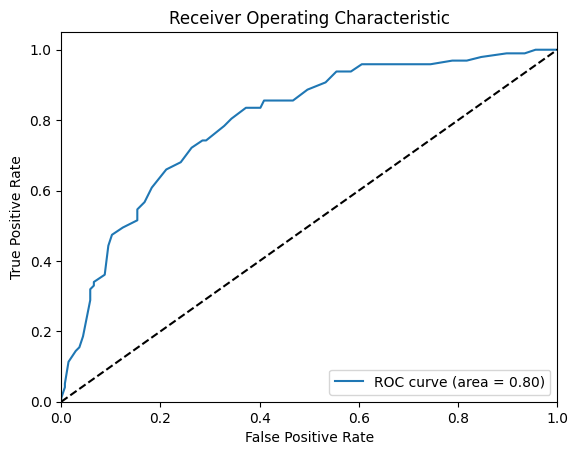

In [320]:
param_grid_random_forest = {'n_estimators': [10, 50, 100]}
results_random_forest = train_and_evaluate_model(RandomForestClassifier(), param_grid_random_forest, X_train, y_train, X_test, y_test)

Model Gradient Boosting Classifier

Najlepsze hiperparametry: {'learning_rate': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.60      0.77      0.68        97
           2       0.57      0.52      0.54       104
           3       0.33      0.15      0.21        26

    accuracy                           0.57       234
   macro avg       0.38      0.36      0.36       234
weighted avg       0.54      0.57      0.55       234

Confusion Matrix:
[[ 0  5  2  0]
 [ 2 75 20  0]
 [ 1 41 54  8]
 [ 0  3 19  4]]


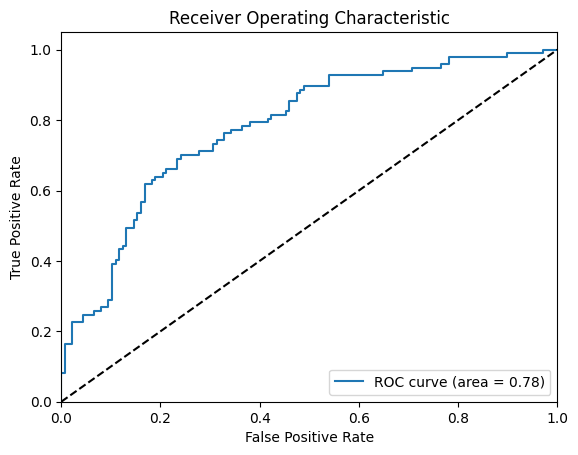

In [321]:
param_grid_gradient_boosting = {'learning_rate': [0.01, 0.1, 1]}
results_gradient_boosting = train_and_evaluate_model(GradientBoostingClassifier(), param_grid_gradient_boosting, X_train, y_train, X_test, y_test)

Porównanie wyników, wybór najlepszego modelu

                        Model                 Best Params  \
3      RandomForestClassifier        {'n_estimators': 50}   
1          LogisticRegression  {'C': 10, 'penalty': 'l2'}   
4  GradientBoostingClassifier     {'learning_rate': 0.01}   
2      DecisionTreeClassifier           {'max_depth': 10}   
0        KNeighborsClassifier          {'n_neighbors': 5}   

                               Classification Report  \
3                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   
4                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   
0                precision    recall  f1-score   ...   

                                    Confusion Matrix   ROC AUC  
3  [[0, 6, 1, 0], [0, 75, 22, 0], [0, 36, 58, 10]...  0.796072  
1  [[0, 5, 2, 0], [0, 76, 20, 1], [0, 38, 55, 11]...  0.784258  
4  [[0, 5, 2, 0], [2, 75, 20, 0], [1, 41, 54, 8],...  0.781022  
2  [[1, 4, 2, 0], [2, 69, 25, 1], [5

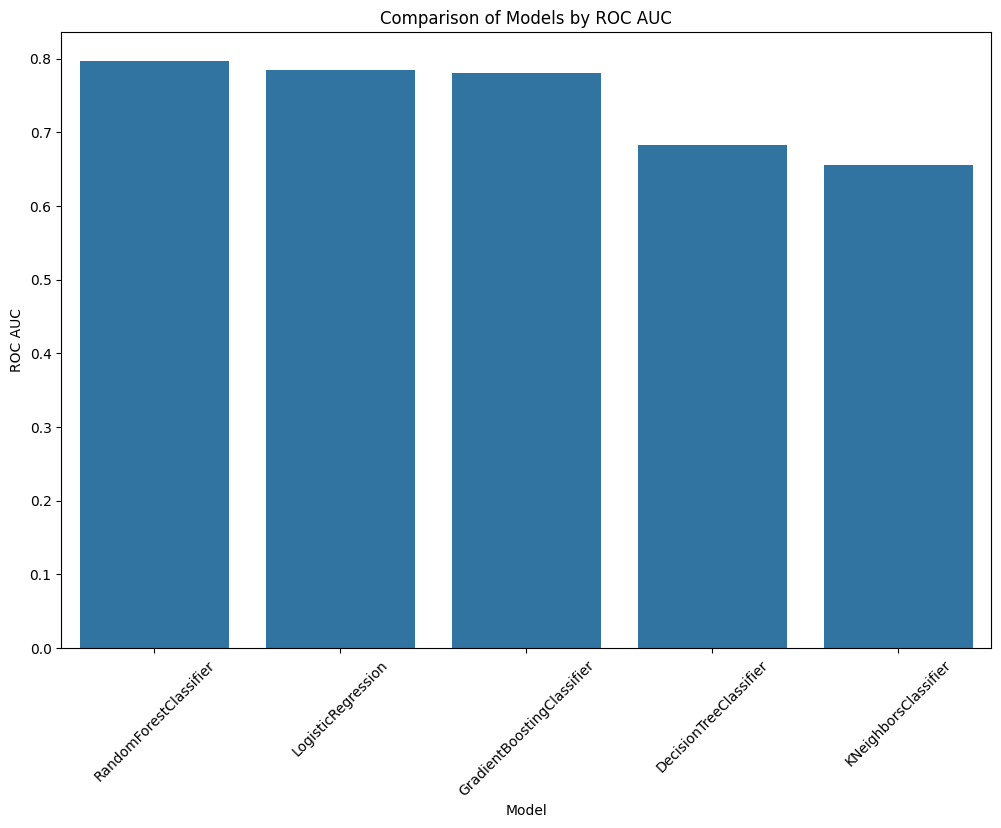

In [322]:
results = [
    results_knn,
    results_log_reg,
    results_decision_tree,
    results_random_forest,
    results_gradient_boosting
]

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort results by ROC AUC
results_df = results_df.sort_values(by='ROC AUC', ascending=False)

print(results_df)

# Plot comparison by ROC AUC
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='ROC AUC', data=results_df)
plt.title('Comparison of Models by ROC AUC')
plt.ylabel('ROC AUC')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

### Wnioski

- Gradient Boosting Classifier i Random Forest są najlepszymi modelami pod względem wydajności na danych dotyczących jakości wina. Te modele mogą być preferowane, gdy priorytetem jest wysoka dokładność przewidywania.

- Logistic Regression może być dobrą alternatywą, jeśli prostota i interpretowalność modelu są ważniejsze.

- K-Nearest Neighbors i Decision Tree nie sprawdziły się dobrze w tym przypadku i mogą wymagać dalszego dostrajania lub użycia bardziej zaawansowanych technik, aby poprawić ich wydajność.

W zależności od specyficznych wymagań biznesowych lub technicznych, wybór odpowiedniego modelu może się różnić, ale na podstawie uzyskanych wyników Gradient Boosting Classifier i Random Forest wykazały najlepszą ogólną wydajność.